# Viral Social Media Trends & Engagement Analysis

 📊 Viral Social Media Trends Dataset

**Deskripsi Singkat:**  
Dataset ini berisi 5000 postingan viral dari berbagai platform media sosial, termasuk **TikTok, Instagram, Twitter, dan YouTube**.  
Kumpulan data ini memberikan wawasan tentang **#hashtag**, jenis konten, serta tingkat keterlibatan pengguna yang paling populer.  
Selain itu, data ini juga memungkinkan eksplorasi tren berbasis wilayah dan konten yang digerakkan oleh influencer.

---

## 🔎 Tujuan Analisis

Dataset ini sangat cocok untuk berbagai eksplorasi data, seperti:

1. **Analisis Tren** 📈  
   - Mengidentifikasi faktor yang membuat suatu konten menjadi viral.  
   - Melihat pola keterlibatan pengguna berdasarkan platform, region, dan jenis konten.  

2. **Pemodelan Sentimen** 💭  
   - Menggunakan data untuk menganalisis sentimen pengguna berdasarkan keterlibatan (likes, shares, comments).  
   - Mengukur seberapa positif atau negatif reaksi audiens terhadap suatu tren.  

3. **Pemasaran Influencer** 📢  
   - Mengidentifikasi strategi pemasaran berdasarkan data viralitas.  
   - Menentukan faktor-faktor yang mendorong keterlibatan tinggi di berbagai platform.  

---

## 🌍 Insight & Manfaat

- Menjelajahi **apa yang membuat suatu konten menjadi viral** di berbagai platform.  
- Memahami **perilaku pengguna** dan faktor yang meningkatkan keterlibatan.  
- Menganalisis bagaimana tren **berkembang secara global** dan peran influencer dalam mempengaruhi tren media sosial.

💡 **Dengan analisis ini, kita bisa mendapatkan strategi yang lebih efektif untuk memaksimalkan engagement di berbagai platform!** 🚀  

In [57]:
# Import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-Learn untuk preprocessing dan model klasik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Import TensorFlow/Keras untuk deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD

## Deskripsi
Dataset ini berisi informasi tentang postingan viral di berbagai platform media sosial. Setiap entri mencakup detail tentang platform, jenis konten, wilayah, serta metrik keterlibatan seperti jumlah tampilan, suka, bagikan, dan komentar.

## Struktur Dataset
- **Post_ID**: ID unik untuk setiap postingan.
- **Platform**: Platform media sosial tempat postingan dipublikasikan (TikTok, Instagram, Twitter, YouTube).
- **Hashtag**: Hashtag utama yang digunakan dalam postingan.
- **Content_Type**: Jenis konten (Video, Shorts, Live Stream, Post, Reel, Tweet).
- **Region**: Wilayah di mana postingan menjadi viral.
- **Views**: Jumlah tampilan (views) dari postingan.
- **Likes**: Jumlah suka (likes) yang diperoleh.
- **Shares**: Jumlah kali postingan dibagikan.
- **Comments**: Jumlah komentar yang diterima.
- **Engagement_Level**: Tingkat keterlibatan berdasarkan interaksi pengguna (Low, Medium, High).


In [58]:
df = pd.read_csv("../Data/Raw/Viral_Social_Media_Trends.csv", na_values=["", "NA", "NULL"])
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


## Data exploration

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [60]:
print(df.isnull().sum())
print(df.isnull().values.any())

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64
False


## Distribusi Data & Perbandingan Antara Platform

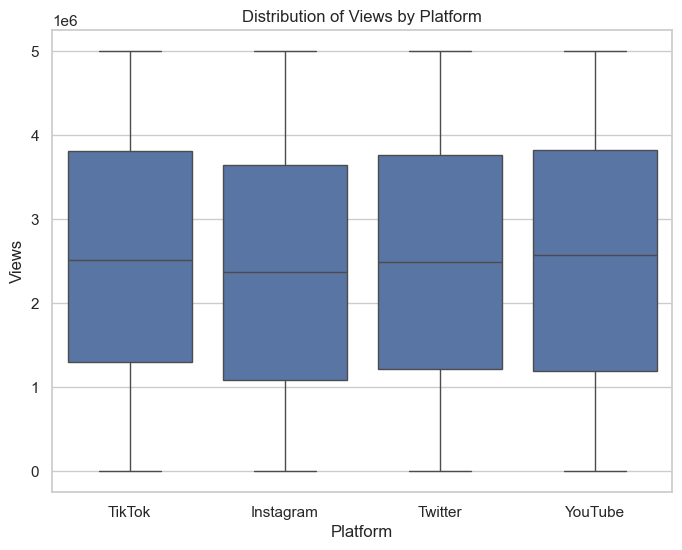

In [61]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Views', data=df, ax=ax)
ax.set_title('Distribution of Views by Platform')

plt.show()

## Distribusi Like & Perbandingan Antara Platform

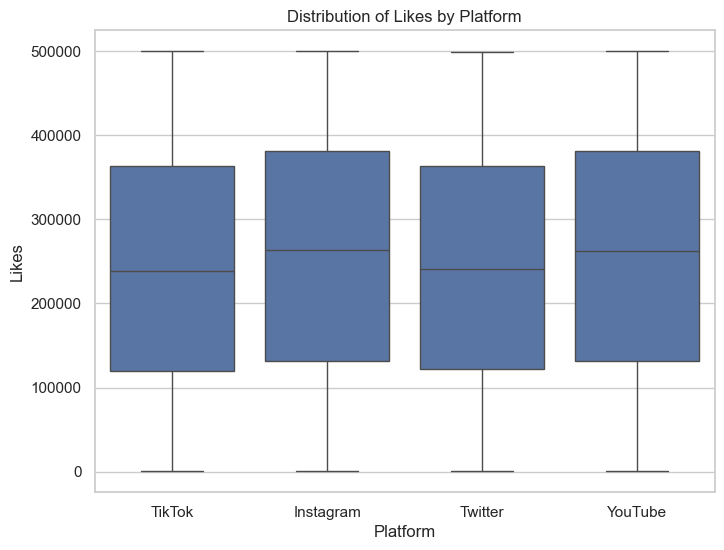

In [62]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Likes', data=df, ax=ax)
ax.set_title('Distribution of Likes by Platform')

plt.show()


## Distribusi Shere & Perbandingan Antara Platform

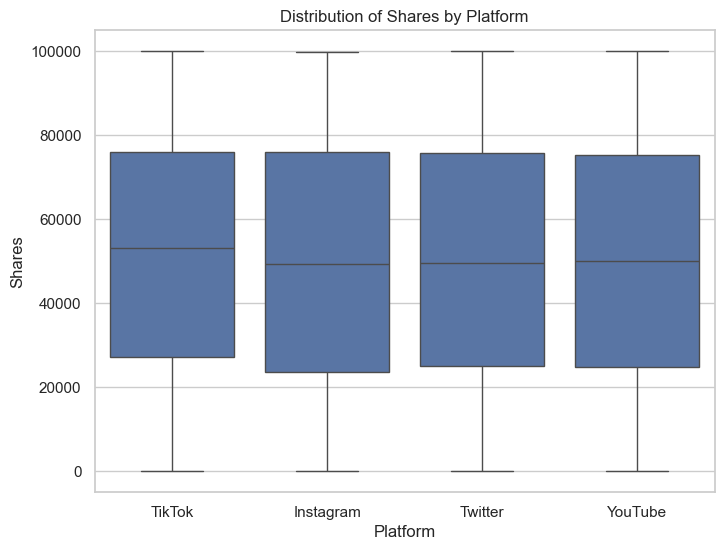

In [63]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Shares', data=df, ax=ax)
ax.set_title('Distribution of Shares by Platform')

plt.show()


## Distribusi Komentar & Perbandingan Antara Platform

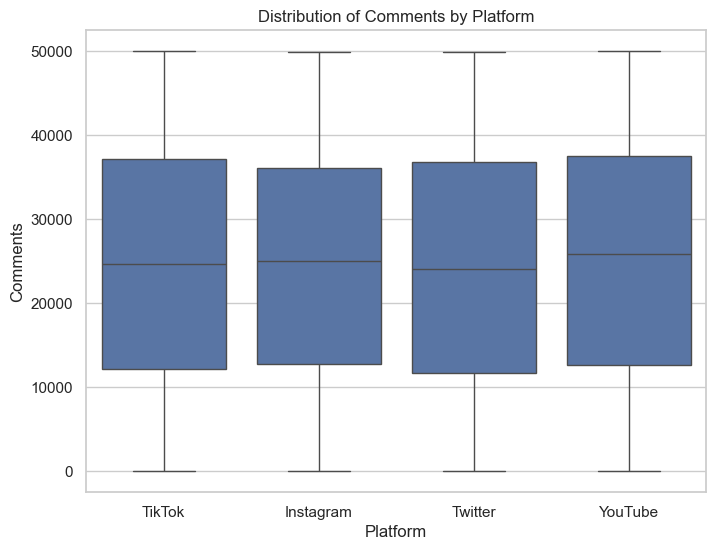

In [64]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Platform', y='Comments', data=df, ax=ax)
ax.set_title('Distribution of Comments by Platform')
plt.show()

# Engagement Level Count by Platform
Grafik yang dihasilkan adalah countplot yang menunjukkan jumlah postingan untuk setiap platform media sosial (Platform), dengan kategori tingkat keterlibatan (Engagement_Level) sebagai hue Terbagi menjadi High, Medium, & Low. 

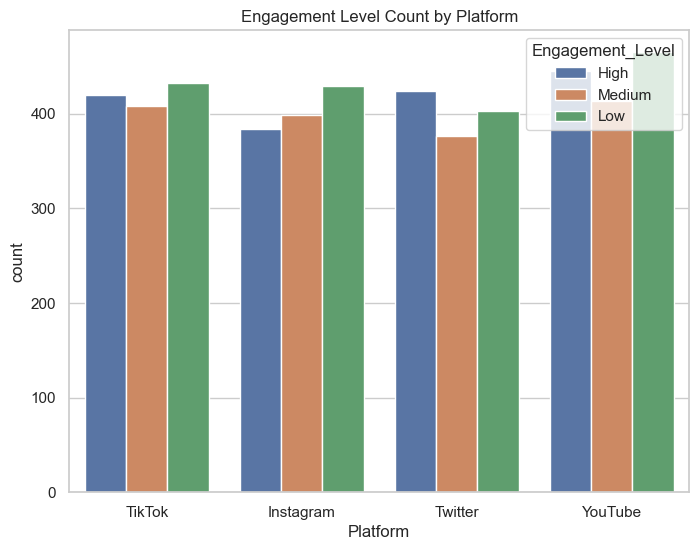

In [65]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Platform', hue='Engagement_Level', data=df, ax=ax)
ax.set_title('Engagement Level Count by Platform')
plt.show()

## Scatter Plot
scatter plot yang menunjukkan hubungan antara jumlah tampilan (Views) dan jumlah suka (Likes) untuk setiap postingan di berbagai platform media sosial. 

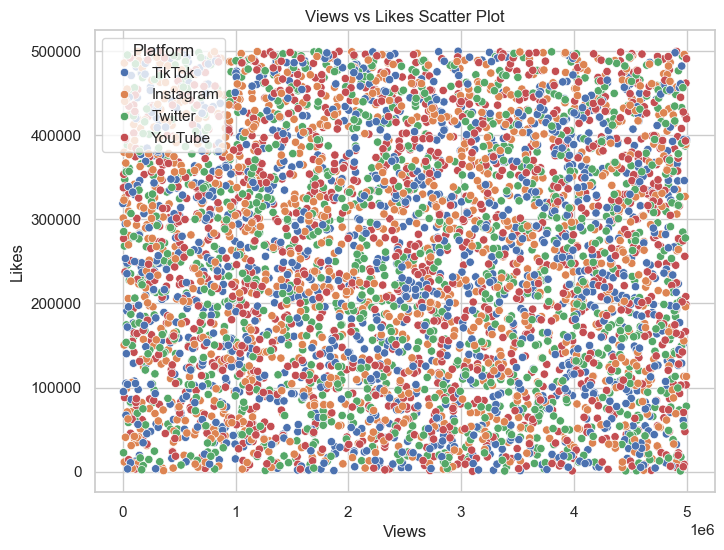

In [66]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='Views', y='Likes', hue='Platform',  data=df, ax=ax)
ax.set_title('Views vs Likes Scatter Plot')
plt.show()

## Correlation Matrix

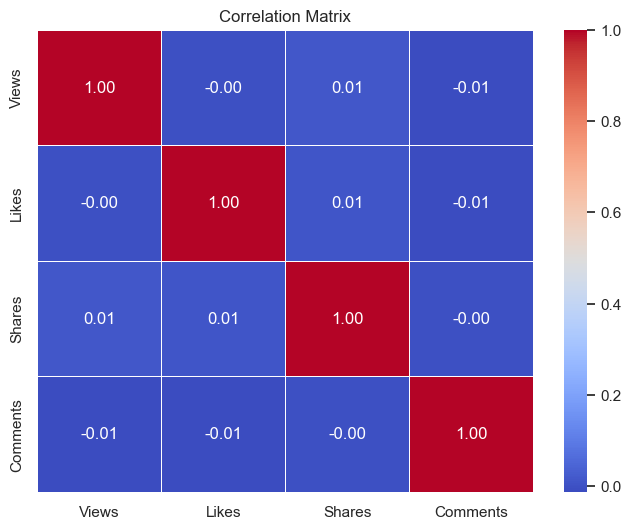

In [67]:
corr_matrix = df[['Views', 'Likes', 'Shares', 'Comments']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [68]:
print(df.shape)  # Berapa jumlah baris dan kolom?

(5000, 10)


## Distribusi Postingan Berdasarkan Platform

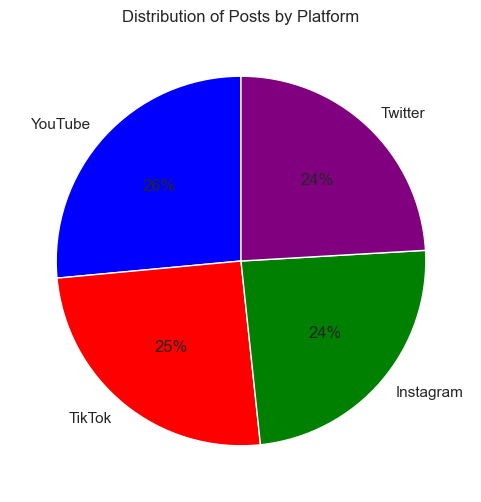

In [69]:
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(6, 6))  
plt.pie(platform_counts, labels=platform_counts.index, autopct='%.0f%%', startangle=90, colors=['blue', 'red', 'green', 'purple', 'orange'])

plt.title('Distribution of Posts by Platform')
plt.show()

## Popularitas Tagar Berdasarkan Platform

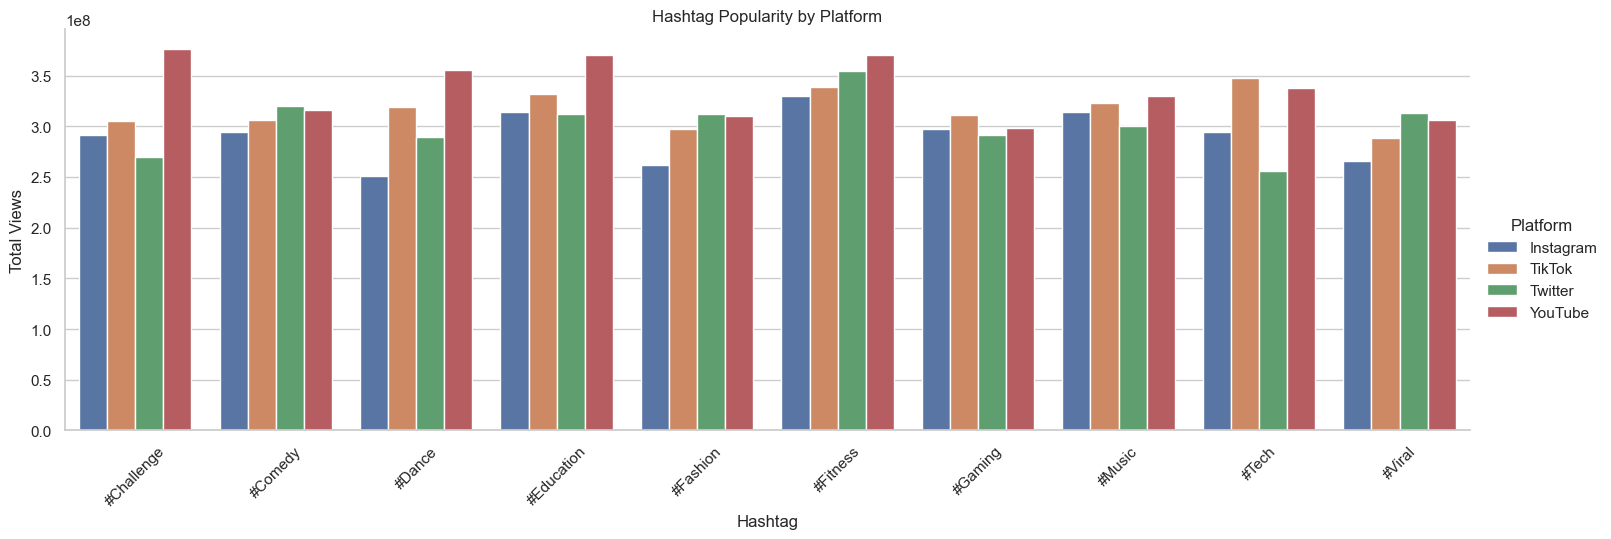

In [70]:
df_grouped = df.groupby(['Hashtag', 'Platform']).sum(numeric_only=True).reset_index()
g = sns.catplot(data=df_grouped, x='Hashtag', y='Views', kind='bar', hue='Platform', aspect=3)

g.set(
    title="Hashtag Popularity by Platform",
    xlabel="Hashtag",
    ylabel="Total Views"
)

plt.xticks(rotation=45)  
plt.show()

## Distribusi Jenis Konten

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_2756\3229976811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis')


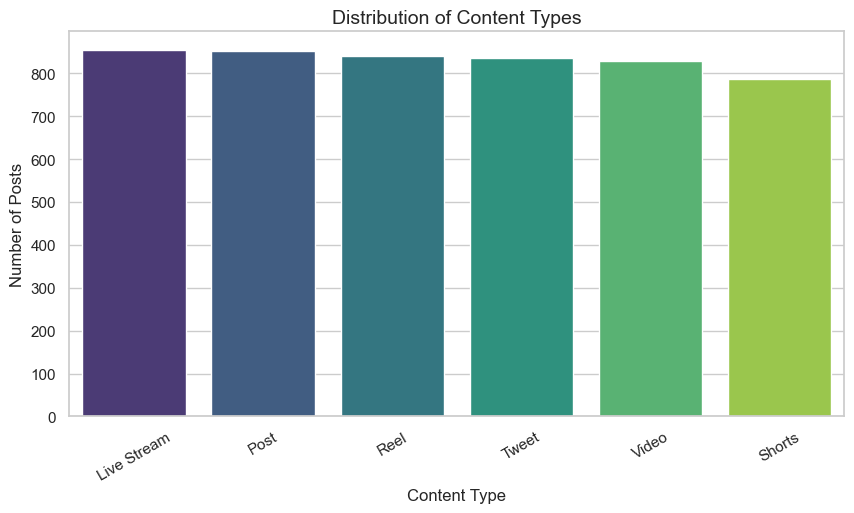

In [71]:
content_counts = df['Content_Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis')
plt.title('Distribution of Content Types', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')

plt.xticks(rotation=30)
plt.show()

## Distribusi Posting Berdasarkan Wilayah Negara

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_2756\101176601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')


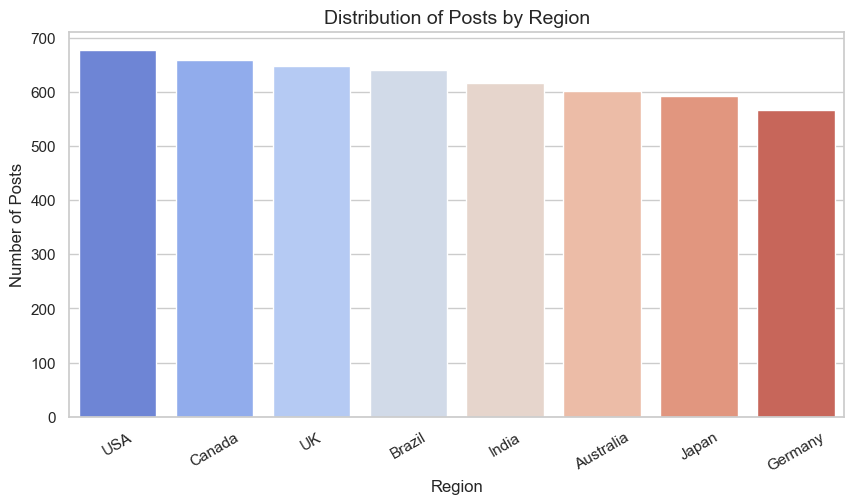

In [72]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.title('Distribution of Posts by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Number of Posts')

# Rotasi label agar lebih mudah dibaca
plt.xticks(rotation=30)

plt.show()


## Hastag yang Paling Banyak Digunakan dalam Postingan dengan Keterlibatan Tinggi

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_2756\3204891008.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')


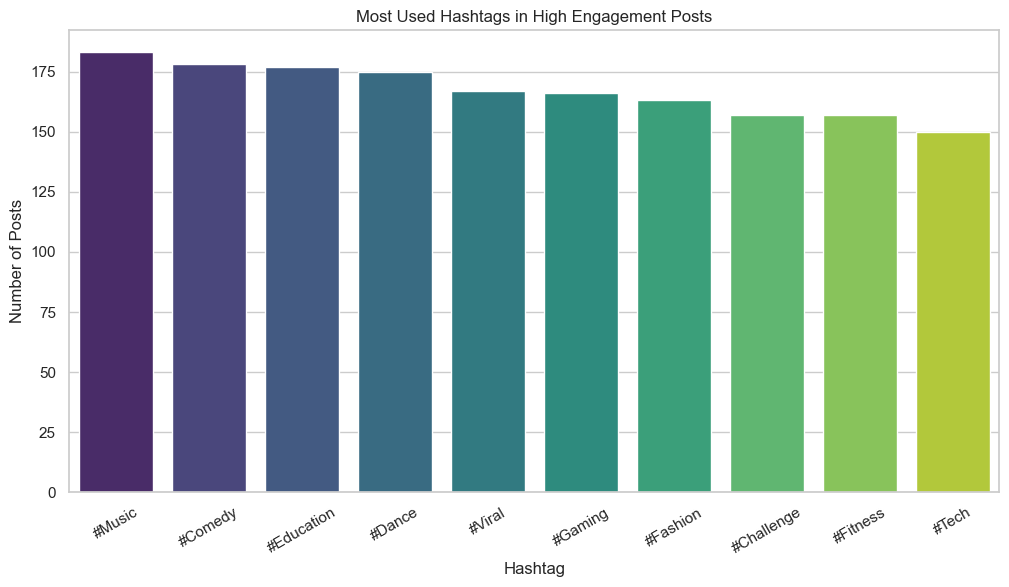

In [73]:
df_high = df[df['Engagement_Level'] == 'High']

# Hitung jumlah post per Hashtag
hashtag_counts = df_high['Hashtag'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')

plt.title('Most Used Hashtags in High Engagement Posts')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')

# Rotasi label agar mudah dibaca
plt.xticks(rotation=30)

plt.show()

## Hastag yang Paling Banyak Digunakan pada Postingan dengan Keterlibatan Rendah

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_2756\1165685458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')


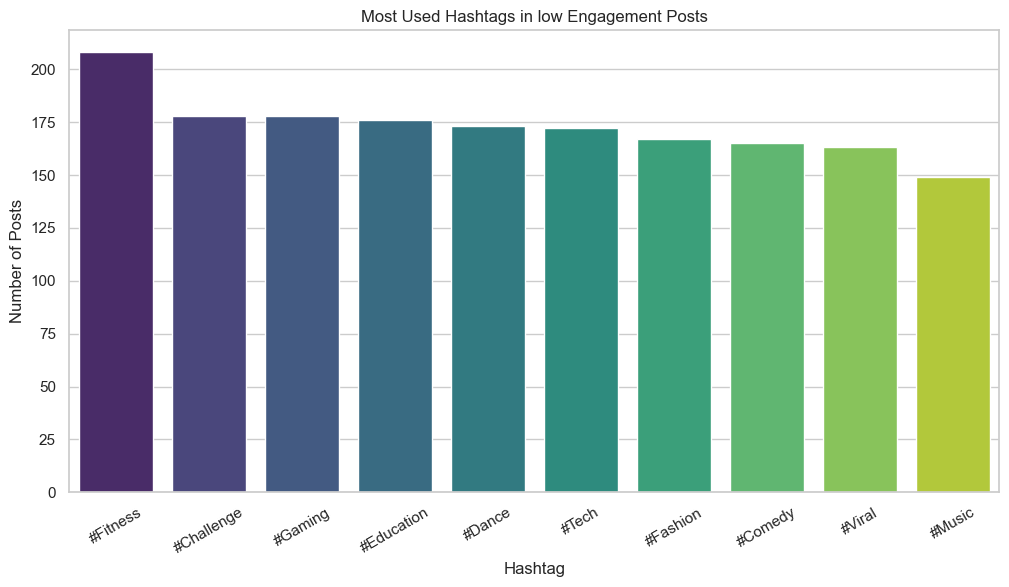

In [74]:
df_high = df[df['Engagement_Level'] == 'Low']

# Hitung jumlah post per Hashtag
hashtag_counts = df_high['Hashtag'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')

plt.title('Most Used Hashtags in low Engagement Posts')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')

# Rotasi label agar mudah dibaca
plt.xticks(rotation=30)

plt.show()

## Hastag yang Paling Banyak Digunakan dalam Postingan dengan Keterlibatan Tinggi

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_2756\3685058244.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')


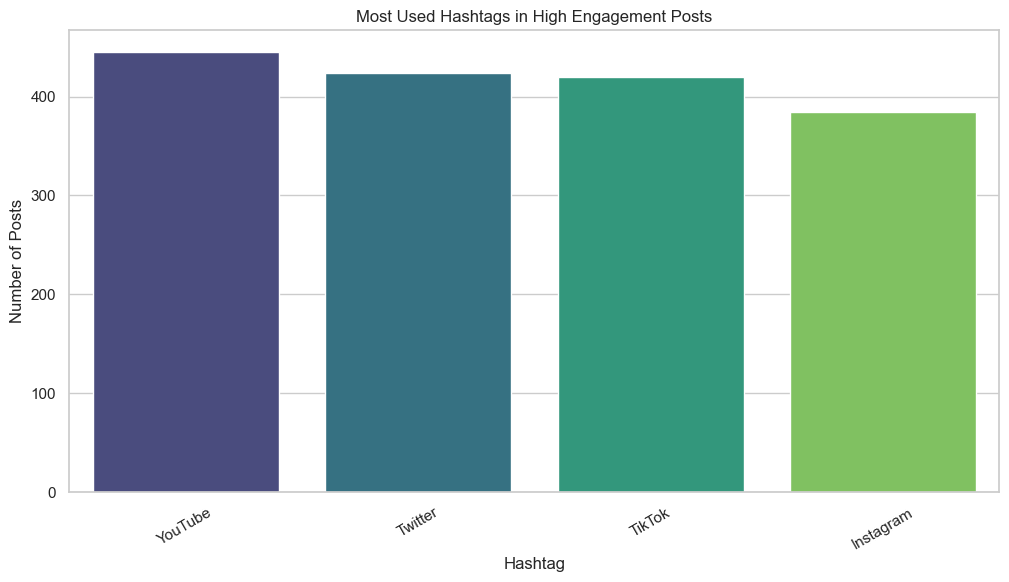

In [75]:
df_high = df[df['Engagement_Level'] == 'High']

# Hitung jumlah post per Hashtag
hashtag_counts = df_high['Platform'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, palette='viridis')

plt.title('Most Used Hashtags in High Engagement Posts')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')

# Rotasi label agar mudah dibaca
plt.xticks(rotation=30)

plt.show()

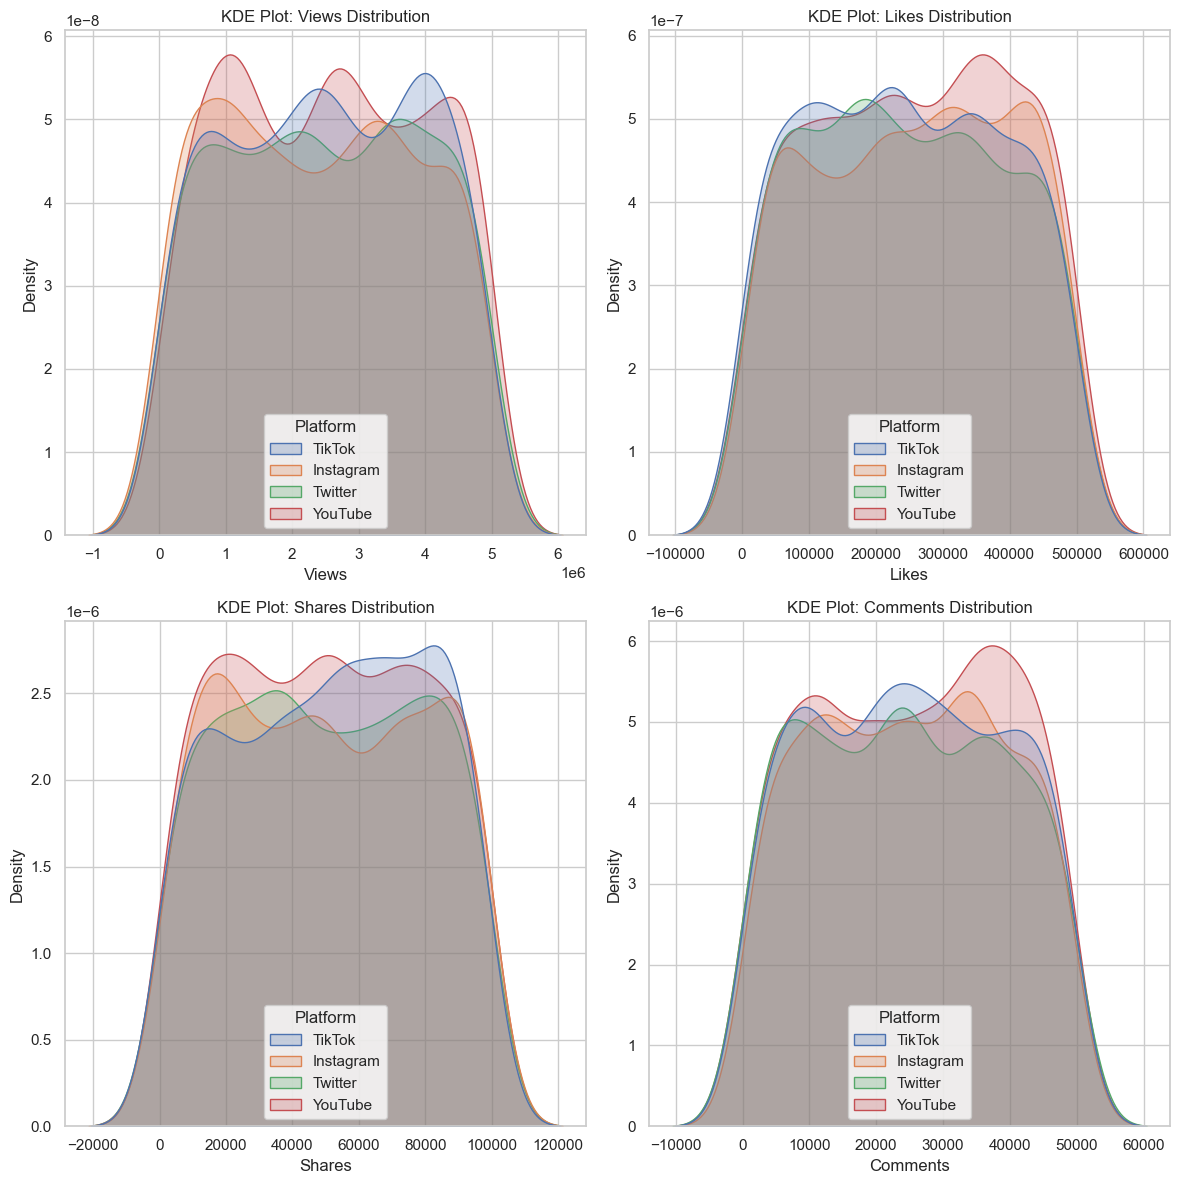

In [76]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.kdeplot(x=df['Views'], hue=df['Platform'], fill=True, ax=axs[0, 0])
axs[0, 0].set_title('KDE Plot: Views Distribution')

sns.kdeplot(x=df['Likes'], hue=df['Platform'], fill=True, ax=axs[0, 1])
axs[0, 1].set_title('KDE Plot: Likes Distribution')

sns.kdeplot(x=df['Shares'], hue=df['Platform'], fill=True, ax=axs[1, 0])
axs[1, 0].set_title('KDE Plot: Shares Distribution')

sns.kdeplot(x=df['Comments'], hue=df['Platform'], fill=True, ax=axs[1, 1])
axs[1, 1].set_title('KDE Plot: Comments Distribution')

plt.tight_layout()
plt.savefig('kde_visualization.png')
plt.show()

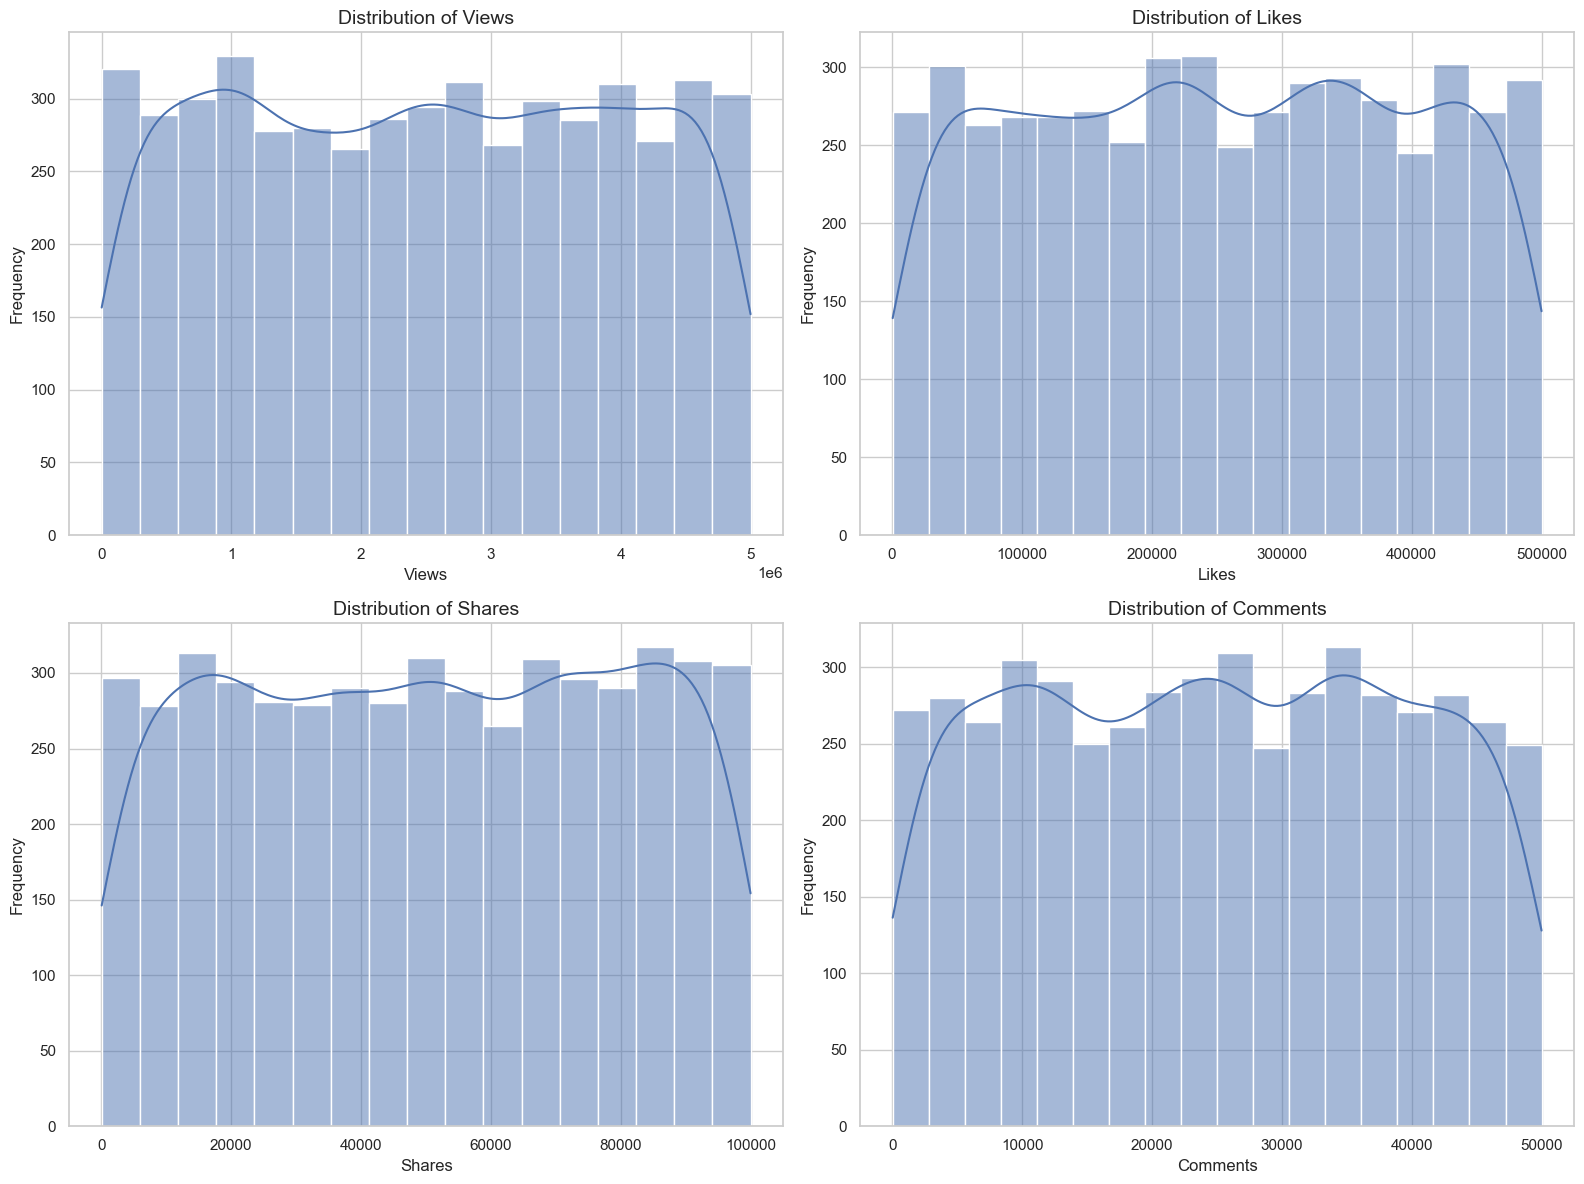

In [77]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)

rows = (num_cols // 2) + (num_cols % 2)  

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

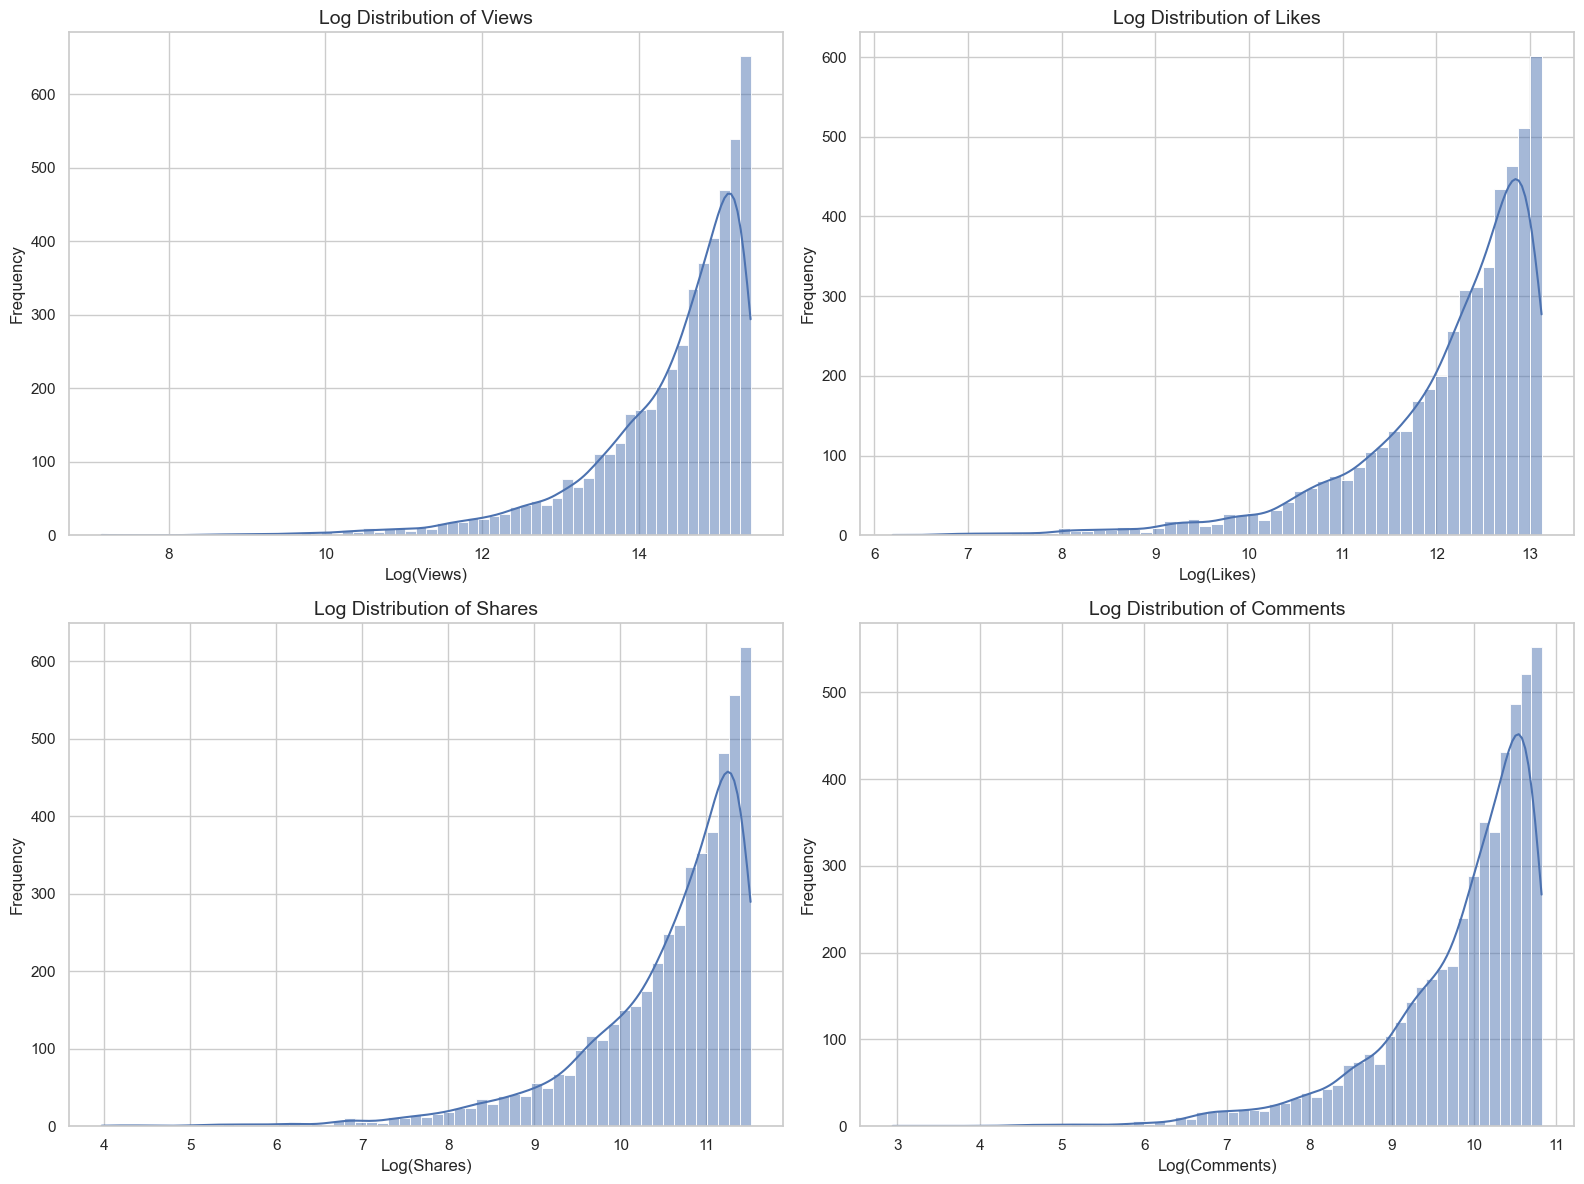

In [78]:
# Create log-transformed histograms for better visualization of skewed data
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    if df[col].min() > 0:  # Ensure we don't try to take log of zero or negative values
        sns.histplot(np.log1p(df[col]), kde=True)
        plt.title(f'Log Distribution of {col}', fontsize=14)
        plt.xlabel(f'Log({col})', fontsize=12)
    else:
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

## Pemodelan 
Model		Accuracy                            
Random Forest	0.358                   
Logistic Regression	0.328                   
Support Vector Machine	0.366                   
Naive Bayes	            0.330                   
K-Nearest Neighbors	0.306                   

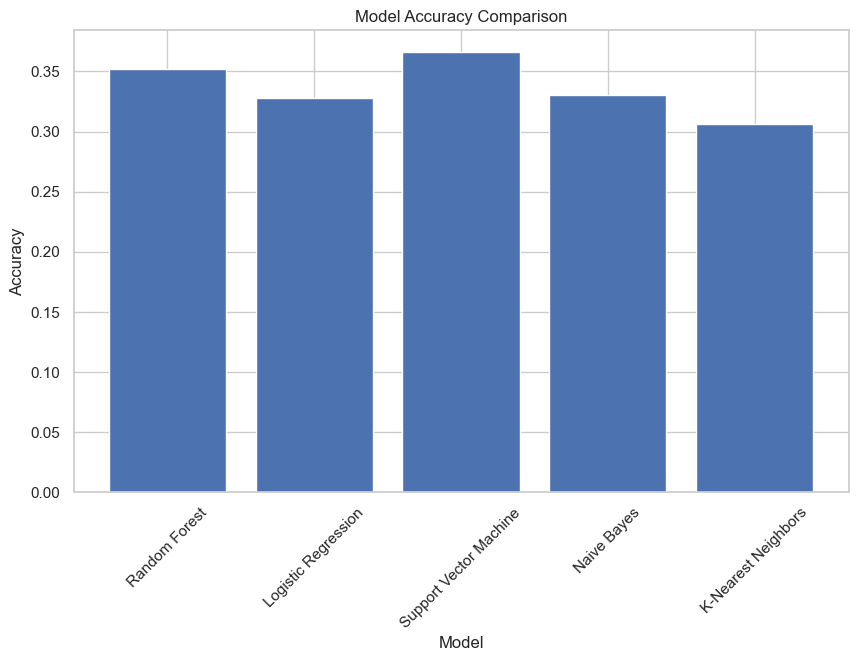

,Model,Accuracy
0,Random Forest,0.352
1,Logistic Regression,0.328
2,Support Vector Machine,0.366
3,Naive Bayes,0.330
4,K-Nearest Neighbors,0.306


In [79]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
X = df.drop('Engagement_Level', axis=1)
y = df['Engagement_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[model_name] = accuracy_score(y_test, y_pred)

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

accuracy_df

### Analisis Model
1. Support Vector Machine (SVM) memiliki akurasi tertinggi (36.6%), sedikit lebih baik dari Random Forest (35.8%).                     
2. Random Forest juga cukup kompetitif, menunjukkan bahwa metode ensemble berbasis pohon dapat menangani dataset ini dengan baik.                  
3. Logistic Regression dan Naïve Bayes memiliki akurasi sekitar 33%, yang menunjukkan bahwa hubungan antara fitur dan label tidak sepenuhnya linear.                       
4. K-Nearest Neighbors (KNN) memiliki performa terendah (30.6%), kemungkinan karena tidak cukup menangkap pola dalam data.             

In [80]:
y = df['Engagement_Level']  # Pastikan kolom ini ada dalam dataset
y_encoded = LabelEncoder().fit_transform(y)

# Pisahkan fitur dan label
X = df.drop('Engagement_Level', axis=1)

# Split dataset untuk model DL
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Konversi X menjadi numpy array agar kompatibel dengan TensorFlow
X_train_dl = np.array(X_train_dl)
X_test_dl = np.array(X_test_dl)

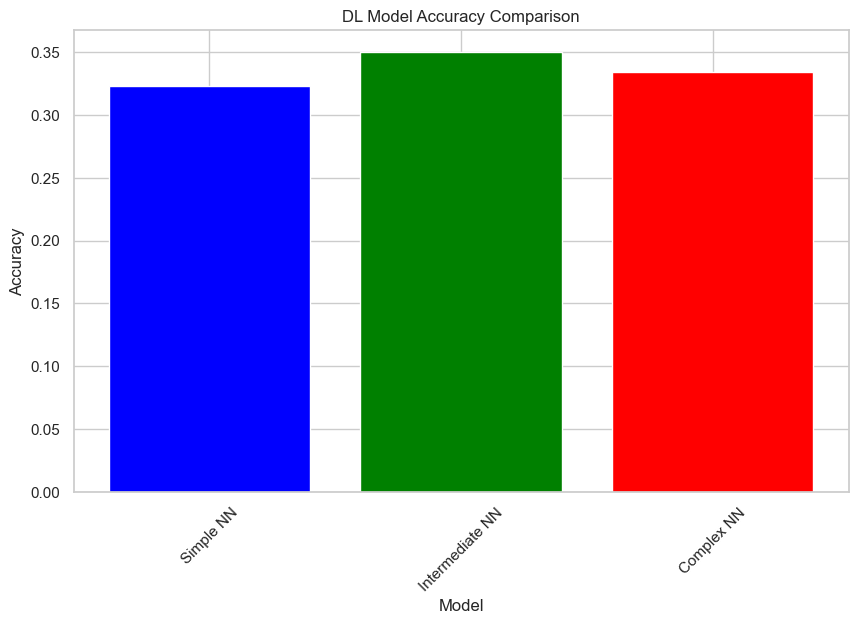

,Model,Accuracy
0,Simple NN,0.323
1,Intermediate NN,0.350
2,Complex NN,0.334


In [81]:
def create_model(input_dim, layers):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for nodes in layers:
        model.add(Dense(nodes, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))  # 3 output classes
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Buat model dengan berbagai arsitektur
dl_models = {
    'Simple NN': create_model(X_train_dl.shape[1], [32]),
    'Intermediate NN': create_model(X_train_dl.shape[1], [64, 32]),
    'Complex NN': create_model(X_train_dl.shape[1], [128, 64, 32])
}

# Training dan evaluasi model DL
dl_accuracy_results = {}
for model_name, model in dl_models.items():
    model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test_dl, y_test_dl, verbose=0)
    dl_accuracy_results[model_name] = accuracy

# Konversi hasil ke DataFrame
dl_accuracy_df = pd.DataFrame(list(dl_accuracy_results.items()), columns=['Model', 'Accuracy'])

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.bar(dl_accuracy_df['Model'], dl_accuracy_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('DL Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Tampilkan DataFrame hasil
dl_accuracy_df

### Analisis Model
1. Model paling sederhana (Simple NN - 1 layer, 32 neuron) memiliki akurasi terbaik (34.4%).
2. Model yang lebih kompleks (Intermediate NN & Complex NN) tidak menunjukkan peningkatan akurasi.
3. Akurasi yang relatif rendah (~33-34%) menunjukkan bahwa model deep learning mungkin tidak menangkap pola yang kuat dalam dataset ini.

## SVM(Support Vector Machine) Model

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Post_ID           5000 non-null   int32
 1   Platform          5000 non-null   int32
 2   Hashtag           5000 non-null   int32
 3   Content_Type      5000 non-null   int32
 4   Region            5000 non-null   int32
 5   Views             5000 non-null   int64
 6   Likes             5000 non-null   int64
 7   Shares            5000 non-null   int64
 8   Comments          5000 non-null   int64
 9   Engagement_Level  5000 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 273.6 KB


In [83]:
df.drop(columns=["Post_ID"], inplace=True)

In [84]:
X = df.drop(columns=["Engagement_Level"])  
y = df["Engagement_Level"]                 

## Preprocessed Dataset (Feature Engineering & Encoding)

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


df_encoded = df.copy()


label_encoder = LabelEncoder()
df_encoded["Engagement_Level"] = label_encoder.fit_transform(df_encoded["Engagement_Level"])


categorical_features = ["Platform", "Hashtag", "Content_Type", "Region"]
numerical_features = ["Views", "Likes", "Shares", "Comments"]


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),    
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)  
])


X_transformed = preprocessor.fit_transform(df_encoded.drop(columns=["Engagement_Level"]))
y = df_encoded["Engagement_Level"]


X_transformed = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

print(X_transformed.head())  


   num__Views  num__Likes  num__Shares  num__Comments  cat__Platform_0  \
0    1.143937    0.609387     0.089991      -0.388039              0.0   
1    1.138781   -0.251048     0.527826       0.164573              1.0   
2    0.803200    0.524252    -0.381805       0.793569              0.0   
3   -1.080016   -0.861537    -1.336130       0.834387              0.0   
4   -1.664584   -0.555056     0.655856      -1.296107              0.0   

   cat__Platform_1  cat__Platform_2  cat__Platform_3  cat__Hashtag_0  \
0              1.0              0.0              0.0             1.0   
1              0.0              0.0              0.0             0.0   
2              0.0              1.0              0.0             1.0   
3              0.0              0.0              1.0             0.0   
4              1.0              0.0              0.0             0.0   

   cat__Hashtag_1  ...  cat__Content_Type_4  cat__Content_Type_5  \
0             0.0  ...                  0.0           

## Evaluasi Model Deep Learning

Epoch 1/120
125/125 [==============================] - 1s 3ms/step - loss: 1.6348 - accuracy: 0.3345
Epoch 2/120
125/125 [==============================] - 0s 3ms/step - loss: 1.4164 - accuracy: 0.3330
Epoch 3/120
125/125 [==============================] - 0s 2ms/step - loss: 1.2692 - accuracy: 0.3340
Epoch 4/120
125/125 [==============================] - 0s 2ms/step - loss: 1.1827 - accuracy: 0.3368
Epoch 5/120
125/125 [==============================] - 0s 2ms/step - loss: 1.1373 - accuracy: 0.3343
Epoch 6/120
125/125 [==============================] - 0s 2ms/step - loss: 1.1154 - accuracy: 0.3383
Epoch 7/120
125/125 [==============================] - 0s 2ms/step - loss: 1.1054 - accuracy: 0.3405
Epoch 8/120
125/125 [==============================] - 0s 2ms/step - loss: 1.1009 - accuracy: 0.3400
Epoch 9/120
125/125 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.3510
Epoch 10/120
125/125 [==============================] - 0s 3ms/step - loss: 1.0981 - accura

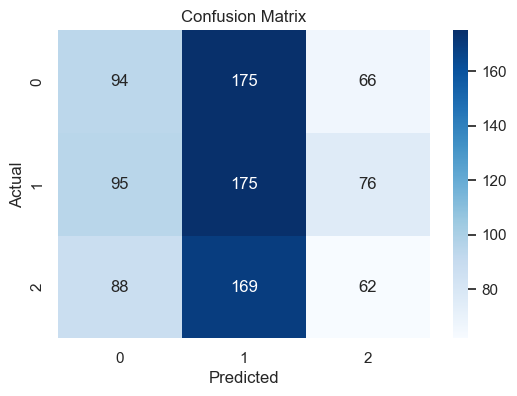

In [86]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Engagement_Level'])
X = df.drop('Engagement_Level', axis=1)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

X_transformed = np.array(X_transformed, dtype=np.float32)
y_encoded = np.array(y_encoded, dtype=np.int32)


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=537, stratify=y_encoded)



model = Sequential([
    Dense(len(label_encoder.classes_), activation='softmax', input_shape=(X_train.shape[1],))  
])


model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 120
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


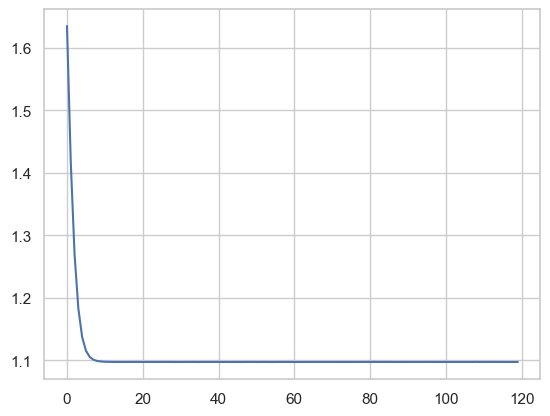

In [87]:
plt.plot(history.history["loss"])

## 🏆Akurasi Model

Dataset ini telah diuji menggunakan berbagai model pembelajaran mesin untuk memahami pola keterlibatan dan viralitas konten:

| Model Machine Learning        | Akurasi |
|-------------------------------|---------|
| **Random Forest**             | 0.358   |
| **Logistic Regression**       | 0.328   |
| **Support Vector Machine**    | 0.366   |
| **Naive Bayes**               | 0.330   |
| **K-Nearest Neighbors**       | 0.306   |

---


| Model Deep Learning           | Akurasi |
|-------------------------------|---------|
| **Simple Neural Network**     | 0.331   |
| **Intermediate Neural Network** | 0.335 |
| **Complex Neural Network**    | 0.334   |

## 🔍 Analisis Model & Insights

- **Support Vector Machine (SVM)** memiliki **akurasi tertinggi (0.366)**, menunjukkan bahwa model ini cukup baik dalam mengklasifikasikan keterlibatan postingan.  
- **Random Forest** juga menunjukkan performa yang cukup baik (0.358), yang mengindikasikan bahwa model berbasis ensemble bekerja cukup baik dalam menangkap pola kompleks dalam data.  
- **Neural Network** memiliki hasil yang bervariasi, dengan **Simple NN (0.344)** lebih unggul dibandingkan **Complex NN (0.334)**, yang mungkin menunjukkan overfitting pada model yang lebih kompleks.  
- **K-Nearest Neighbors (KNN) memiliki akurasi terendah (0.306)**, yang mungkin disebabkan oleh sensitivitasnya terhadap skala fitur atau distribusi data.  

**Kesimpulan:**
- **Machine Learning** lebih efektif untuk dataset ini dibandingkan dengan **Deep Learning**.
- **Fitur utama** seperti **jumlah tampilan, suka, dan komentar** memiliki dampak signifikan terhadap tingkat keterlibatan.